# Preparación de datos

[Original Notebook source from *Data Science: Introduction to Machine Learning for Data Science Python and Machine Learning Studio by Lee Stott*](https://github.com/leestott/intro-Datascience/blob/master/Course%20Materials/4-Cleaning_and_Manipulating-Reference.ipynb)

Adaptado por Giovanni Rottoli para las clases de
- Ciencia de Datos (UTN-FRCU)
- Inteligencia de Negocios (DW y DS) (UTN-FRBA)

2025

## Exploración de `DataFrame`

> **Objetivo:** Aprender herramientas de la librería Pandas para la exploración y transformación de datos.

Una vez cargados los datos en Pandas, lo más probable es que se encuentren en un *DataFrame*. Pandas ofrece herramientas prácticas para consultar rápidamente la información general de un DataFrame, además de las primeras y las últimas filas.

Para explorar esta funcionalidad, importaremos la biblioteca scikit-learn de Python y utilizaremos el conjunto de datos *Iris* del biólogo británico Ronald Fisher, utilizado en su artículo de 1936 "El uso de múltiples mediciones en problemas taxonómicos". Este conjunto de datos es un dataset clásico de juguete usado para aprendizaje.

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

### `DataFrame.shape`
Cargamos el conjunto de datos en la variable  `iris_df`. Generalmente, resulta util conocer las dimensiones del conjunto de datos para saber con cuantos datos contamos.

In [4]:
iris_df.shape

(150, 4)

Por lo tanto, trabajamos con 150 filas y 4 columnas de datos. Cada fila representa un punto de datos y cada columna representa un atributo.
En este caso, `shape` es un atributo del marco de datos y no una función.


### `DataFrame.columns`
El atributo `columns` nos devuelve los nombres de las atributos del dataframe

In [5]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### `DataFrame.info`
La función  `DataFrame.info()` nos permite determinar más información sobre los datos de cada columna. 

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Acá podemos observar dos cosas
1. El tipo de cada columna: en este dataframe todos los datos son números de tipo float.
2. El número de datos no nulos: Podemos comparar el número de entradas que se mencionan (rangeindex) con el número de no nulos, para saber cuantos datos perdidos hay en cada columna.

### DataFrame.describe()
Si tenemos datos numéricos, se pueden obtener descriptores estadísticos para hacer un análisis univariado. Para esto,  `DataFrame.describe()` nos permite hacer estos cálculos, solo para las columnas numéricas.



In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Esta tabla nos brinda información sobre la cantidad de puntos, el promedio, la desviación estandar, el máximo, mínimo, y los cuartiles para cada columna.

Hagamos un boxplot también para cada columna numérica. 

<Axes: >

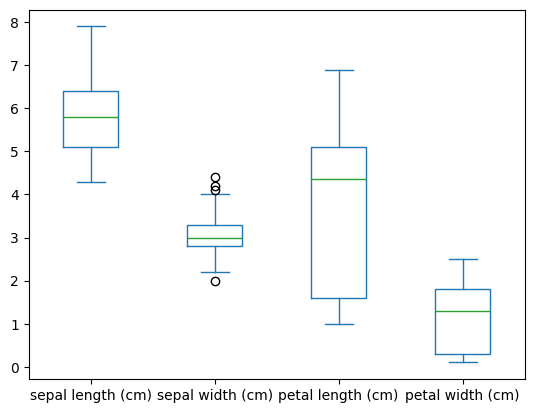

In [9]:
iris_df.plot(kind='box')

### `DataFrame.head`
Con las funciones anteriores, podemos tener un overview del conjunto de datos. 
Para ver los datos mismos, resulta util ver las primeras y ultimas filas, para tener una idea de cómo está compuesto:

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Por defecto, la función head nos devuelve las primera 5 filas de la base de datos.

### Ejercicio:

Quiero ver más de 5 primeras filas de la base de datos. ¿Cómo lo hago? 

In [ ]:
# Consultar la documentación.

### `DataFrame.tail`
También se pueden ver las últimas 5 filas usando esta función

In [11]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


En la práctica, es útil ver las primeras filas de la base de datos, especialmente cuando estamos buscando anomalías en conjuntos ordenados. Los valores más grandes o más pequeños se ubican al principio y al final de la base de dtos.

### Datos perdidos

Ya vimos que cuando no hay valores en celdas de la base de datos, hablamos de datos perdidos o nulos.
Por ejemplo, alguien que no sepa cuanto pesa puede dejar ese campo en blanco en un formulario, por lo que en la base de datos aparecerá como un dato perdido.

**Pandas puede manejar datos perdidos**

Pandas maneja los valores faltantes de dos maneras: Primeramente, pandas asigna un valor «NaN» (No es un número) en estas posiciones. Este es un valor especial que forma parte de la especificación IEEE de coma flotante y solo se utiliza para indicar valores faltantes de coma flotante.

En otros casos, Pandas utiliza el objeto «None» de Python. Esta diferencia la hace pandas por motivos de programación y manejo interno de tipos.

### `None`: Datos no flotantes

 `None` es un objeto de Python, no puede usarse en atributos que no sean del tipo `'object'`. Cuando hay un  `None` en el array, sabemos que no es un array de numpy, sino que estamos trabajando con objetos de python.

Veamos el ejemplo siguiente (prestá atención a `dtype`):

In [13]:
import numpy as np
# Creamos un array de numpy con 4 valores, uno de los cuales es None
example1 = np.array([2, None, 6, 8])
example1

array([2, None, 6, 8], dtype=object)

Cuando hay un objeto None en el array, se maneja a nivel interpretado del código python, no utiliza las funciones compiladas de Numpy, por lo que cualquier operación sobre `Series` o `DataFrames` que tengan algun valor `None`, van a ser mas lentas. Para grandes conjuntos de datos esto ha de ser tenido en cuenta.

Por otro lado, ya que el valor `None` nos lleva a tratar las  `Series` o `DataFrame` como código de python "normal", al utilizar funciones de numpy o pandas como  `sum()` o `min()` nos puede llevar a tener errores:

In [14]:
example1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

**Por qué pasa?**:  La suma y otras operaciones entre integers y valores None no se encuentra definida.

### `NaN`: valores float perdidos

En cambio, Numpy, y por lo tanto Pandas, suporta `NaN` para realizar operaciones sobre columnas vectorizadas de manera rápida. No obstante, cualquier operación aritmética que se realice sobre un valor  `NaN` siempre devuelve  `NaN`. Por ejemplo:

In [15]:
np.nan + 1

nan

In [16]:
np.nan * 0

nan

La buenta noticia es que las agregaciones con valores `NaN` no arrojan errores. La mala noticia es que los resultados no son útiles.

In [17]:
example2 = np.array([2, np.nan, 6, 8]) 
example2.sum(), example2.min(), example2.max()

(np.float64(nan), np.float64(nan), np.float64(nan))

### Ejercicio:

In [18]:
# Que pasa si tienes un array con NaN y None juntos


Recordar qué: `NaN` es SOLO para valores perdidos de PUNTO FLOTANTE. No hay equivalente de `NaN` para integers, strings, o Booleans.

### `NaN` y `None`: null values en pandas

Si bien  `NaN` y `None`  pueden comportarse de forma distinta, Pandas puede manejarlos de manera indistinta. Considera lo siguiente:

In [19]:
int_series = pd.Series([1, 2, 3], dtype=int)
int_series

0    1
1    2
2    3
dtype: int64

### Ejercicio:
1. Setea un elemento de la serie int_series para que sea None
2. ¿Cómo aparece ese elemento en la serie?
3. ¿Cuál es el dtype de la serie?

In [ ]:
# Now set an element of int_series equal to None.
# How does that element show up in the Series?
# What is the dtype of the Series?



En el proceso de conversión de tipos de datos para establecer la homogeneidad de los datos en "Series" y "DataFrame", pandas alternará voluntariamente los valores faltantes entre "None" y "NaN". Debido a esta característica de diseño, puede ser útil considerar "None" y "NaN" como dos variantes diferentes de "null" en pandas. De hecho, algunos de los métodos principales que se utilizarán para gestionar los valores faltantes en pandas reflejan esta idea en sus nombres:

- `isnull()`: Genera una máscara booleana que indica los valores faltantes.
- `notnull()`: Lo opuesto a `isnull()`
- `dropna()`: Devuelve una versión filtrada de los datos.
- `fillna()`: Devuelve una copia de los datos con los valores faltantes rellenados o imputados.

Familiarícense con estas funciones.


### Detectando valores null


Ambas funciones, `isnull()` y `notnull()`, son los principales para detectar datos nulos. Ambos devuelven máscaras booleanas sobre los datos.

In [20]:
example3 = pd.Series([0, np.nan, '', None])

In [21]:
example3.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Tanto el 0 como la cadena vacía son elementos válidos, no nulos. Los valores NaN y None son considerados Nulos.

Podemos usar esta máscara como un índice sobre  ``Series`` o ``DataFrame`` para trabajar con valores faltantes (o presentes) aislados.

Si queremos el número total de valores faltantes, podemos simplemente realizar una suma sobre la máscara generada por el método `isnull()`.

In [22]:
example3.isnull().sum()

np.int64(2)

### Ejercicio:

1. Lee la siguiente función:   ``example3[example3.notnull()]``
2. ¿Qué creen que hace?
3. Ejecutala en la celda siguiente y verifica el resultado

In [23]:
# Probar acá


 `isnull()` y `notnull()` producen resultados similares cuando estamos operando sobre Dataframes. 

### Como manejar datos nulos


Los modelos de aprendizaje automático no pueden manejar los datos faltantes por sí solos. Por lo tanto, antes de pasar los datos al modelo, debemos hacer algo con estos valores faltantes.

La gestión de los datos faltantes trae desventajas que pueden afectar el análisis final y los resultados reales.

En clases vimos distintas estrategias para menejar los valores faltantes. Veremos las siguientes:

1. Eliminar la fila que contiene el valor faltante.
2. Reemplazar el valor faltante por otro (inputar). 

Analizaremos ambos métodos y sus ventajas y desventajas en detalle.



### Eliminar valores null

La cantidad de datos con los que operamos tiene un efecto directo en su rendimiento. Eliminar valores nulos implica reducir el número de puntos de datos y, por lo tanto, el tamaño del conjunto de datos. Por lo tanto, es recomendable eliminar las filas con valores nulos cuando el conjunto de datos es bastante grande.

Otro caso podría ser que una fila o columna tenga muchos valores faltantes. En ese caso, podrían eliminarse porque no aportarían mucho valor a nuestro análisis, ya que falta la mayoría de los datos para esa fila/columna.

Además de identificar valores faltantes, Pandas ofrece una forma de eliminar valores nulos de las `Series` y los `DataFrame`. La función  `DataFrame.dropna()` permite eliminar las filas con valores nulos.


In [24]:
example3 = example3.dropna()
example3

0    0
2     
dtype: object

Esto devería devolver lo mismo que  `example3[example3.notnull()]`. La diferencia es que `dropna` eliminó los datos nulos de la `Series` `example3`.

Como los DataFrames tienen dos dimensiones, se pueden eliminar filas o columnas

In [25]:
example4 = pd.DataFrame([[1,      np.nan, 7], 
                         [2,      5,      8], 
                         [np.nan, 6,      9]])
example4

,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


No se puede eliminar un solo valor de un `DataFrame`, por lo que se deben eliminar filas o columnas completas.  Es más probable que se eliminen filas de datos, por lo que la configuración predeterminada de `dropna()` es eliminar todas las filas que contengan valores nulos:

In [26]:
example4.dropna()

,0,1,2
1,2.0,5.0,8


Para eliminar las columnas con algun dato faltante, usa `axis=1` como parámetro:

In [27]:
example4.dropna(axis='columns')

,2
0,7
1,8
2,9


Hay que tener en cuenta que esto puede descartar muchos datos que quizás desee conservar, especialmente en conjuntos de datos pequeños. ¿Qué sucede si solo se quiere descartar filas o columnas que contienen varios o todos los valores nulos? Se debe especificar esta configuración en `dropna` con los parámetros `how` y `thresh`.

Por defecto, `how='any'`, elimina la fila/columna si la misma tiene algún elemento perdido. `how='all'` solo las filas o columnas que contienen todos los valores nulos. 

In [29]:
example4[3] = np.nan # Asignamos nan a toda la columna 3
example4

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


En resumen:
1. Descartar valores nulos solo es recomendable si el conjunto de datos es lo suficientemente grande.
2. Se pueden descartar filas o columnas completas si faltan la mayoría de los datos.
3. El método `DataFrame.dropna(axis=)` ayuda a descartar valores nulos. El argumento `axis` indica si se deben descartar filas o columnas.
4. También se puede usar el argumento `how`. Por defecto, está configurado como `any`. Por lo tanto, solo se descartan las filas/columnas que contienen valores nulos. Se puede configurar como `all` para especificar que solo se descartarán las filas/columnas donde todos los valores sean nulos.

### Ejercicio:

1. Eliminar solo la columna 3

El parámetro `thresh` brinda un control más preciso: se establece la cantidad de valores **no nulos** que una fila o columna debe tener para **conservarse**:

In [30]:
example4.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,5.0,8,NaN


La primera y última fila se descartan porque solo tienen dos valores no nulos.

### Inputación de valores nulos

A veces conviene completar los valores faltantes con valores que podrían ser válidos. Existen algunas técnicas para completar valores nulos. La primera consiste en utilizar el conocimiento del dominio  para aproximar de alguna manera los valores faltantes.

Se podría usar `isnull` para hacerlo, pero puede ser difícil, sobre todo si hay muchos valores que completar. Dado que esta es una tarea común en la ciencia de datos, Pandas proporciona `fillna`, que devuelve una copia de `Series` o `DataFrame` con los valores faltantes reemplazados por uno de su elección. 

### Datos categóricos (Non-numeric)
Cuando hay datos categóricos, los valores faltantes se pueden reemplazar con la moda de la columna. Supongamos que tenemos 100 puntos de datos y 90 son verdaderos, 8 son falsos y 2 no se han completado. Entonces, podemos convertir los 2 en verdaderos, considerando la columna completa.

También podemos usar el conocimiento del dominio. Consideremos un ejemplo de llenado con la moda.

In [31]:
fill_with_mode = pd.DataFrame([[1,2,"True"],
                               [3,4,None],
                               [5,6,"False"],
                               [7,8,"True"],
                               [9,10,"True"]])

fill_with_mode

,0,1,2
0,1,2,True
1,3,4,None
2,5,6,False
3,7,8,True
4,9,10,True


Encontremos la moda de la columna 2

In [32]:
fill_with_mode[2].value_counts()

2
True     3
False    1
Name: count, dtype: int64

Como la moda es True (frecuencia igual a 3), reemplazamos los None con el valor 3

In [33]:
fill_with_mode[2].fillna('True',inplace=True)

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\4126059438.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_with_mode[2].fillna('True',inplace=True)


In [34]:
fill_with_mode

,0,1,2
0,1,2,True
1,3,4,True
2,5,6,False
3,7,8,True
4,9,10,True


### Datos numéricos
Ahora, existen dos formas comunes de reemplazar valores faltantes de tipo numérico usando medidas de tendencia central:

1. Reemplazar con la mediana de la fila
2. Reemplazar con la media de la fila

En el caso de datos asimétricos con valores atípicos, se reemplaza con la mediana. Esto se debe a que la mediana es robusta a los outliers, como vimos en clases.

Cuando los datos están normalizados, podemos usar la media, ya que en ese caso, la media y la mediana serían bastante similares.

Primero, tomemos una columna con distribución normal y completemos el valor faltante con la media de la columna.

In [35]:
fill_with_mean = pd.DataFrame([[-2,0,1],
                               [-1,2,3],
                               [np.nan,4,5],
                               [1,6,7],
                               [2,8,9]])

fill_with_mean

,0,1,2
0,-2.0,0,1
1,-1.0,2,3
2,NaN,4,5
3,1.0,6,7
4,2.0,8,9


El primedio de la columna 0 es:

In [36]:
np.mean(fill_with_mean[0])

np.float64(0.0)

Completamos los faltantes con ese valor, hagamos todo en una línea

In [37]:
fill_with_mean[0].fillna(np.mean(fill_with_mean[0]),inplace=True)
fill_with_mean

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\4283396497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_with_mean[0].fillna(np.mean(fill_with_mean[0]),inplace=True)


,0,1,2
0,-2.0,0,1
1,-1.0,2,3
2,0.0,4,5
3,1.0,6,7
4,2.0,8,9


Ahora probemos con la mediana:

In [38]:
fill_with_median = pd.DataFrame([[-2,0,1],
                               [-1,2,3],
                               [0,np.nan,5],
                               [1,6,7],
                               [2,8,9]])

fill_with_median

,0,1,2
0,-2,0.0,1
1,-1,2.0,3
2,0,NaN,5
3,1,6.0,7
4,2,8.0,9


La mediana de la columna 2 es:

In [39]:
fill_with_median[1].median()

np.float64(4.0)

Reemplacemos:

In [40]:
fill_with_median[1].fillna(fill_with_median[1].median(),inplace=True)
fill_with_median

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\2115569448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fill_with_median[1].fillna(fill_with_median[1].median(),inplace=True)


,0,1,2
0,-2,0.0,1
1,-1,2.0,3
2,0,4.0,5
3,1,6.0,7
4,2,8.0,9


In [44]:
example5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
example5

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

Puntos clave:
1. Se deben completar los valores faltantes cuando hay menos datos o existe una estrategia para completarlos.
2. El conocimiento del dominio puede utilizarse para completar los valores faltantes mediante su aproximación.
3. En el caso de los datos categóricos, los valores faltantes se sustituyen generalmente por la moda de la columna.
4. En el caso de los datos numéricos, los valores faltantes suelen completarse con la media (en conjuntos de datos normalizados) o la mediana de las columnas.

### Ejercicio:

In [45]:
# Qué pasa si queremos reemplazar valores nulos con una cadena como ''?


Otras estrategias que se pueden utilizar es propagar el valor válido previo hacia las celdas vacías:( **forward-fill** )

In [46]:
example5.fillna(method='ffill')

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\3194571100.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  example5.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

**back-fill** propaga el valor válido siguiente:

In [61]:
example5.fillna(method='bfill')

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\2679643382.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  example5.fillna(method='bfill')


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

También se puede hacer por columnas especificando el axis

In [62]:
example4

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


In [63]:
example4.fillna(method='ffill', axis=1)

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\841513876.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  example4.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,7.0,7.0
1,2.0,5.0,8.0,8.0
2,NaN,6.0,9.0,9.0


Si no hay un valor válido previo, el valor nulo se queda nulo

### Encoding Datos Categóricos

Los modelos de aprendizaje automático solo procesan números y cualquier tipo de dato numérico. Por lo tanto, después de completar los valores faltantes, necesitamos codificar los datos categóricos en formato numérico para que el modelo los comprenda.

La codificación se puede realizar de dos maneras.


**LABEL ENCODING**


El label encoding consiste básicamente en convertir cada categoría en un número. Por ejemplo, supongamos que tenemos un conjunto de datos de pasajeros de aerolíneas y hay una columna que contiene su clase entre las siguientes ['clase ejecutiva', 'clase económica', 'primera clase']. Con Label Encoding, esta columna se transformaría a [0,1,2]. 

Hagamos esto de forma artesanal ahora, y cuando veamos más de la librería scikit-learn profundizaremos sobre cómo automatizar esta tarea.

In [68]:
label = pd.DataFrame([
                      [10,'business class'],
                      [20,'first class'],
                      [30, 'economy class'],
                      [40, 'economy class'],
                      [50, 'economy class'],
                      [60, 'business class']
],columns=['ID','class'])
label

,ID,class
0,10,business class
1,20,first class
2,30,economy class
3,40,economy class
4,50,economy class
5,60,business class


Tenemos ahora que mapear cada valor con un número. Usaremos un diccionario para esto, y luego vamos a usar la función "replace" para reemplazar las ocurrencias según lo que indica el diccionario

In [69]:
class_labels = {
    'business class':0,
    'economy class':1,
    'first class':2
}
label['class'] = label['class'].replace(class_labels)
label

C:\Users\gdrot\AppData\Local\Temp\ipykernel_24196\3840240640.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label['class'] = label['class'].replace(class_labels)


,ID,class
0,10,0
1,20,2
2,30,1
3,40,1
4,50,1
5,60,0


**ONE HOT ENCODING**

Otro tipo de encoding es el **One Hot Encoding**. Aquí tendremos una nueva columna por cada valor de la columna a codificar. Estas nuevas columnas serán booleanas y tendrán un 0 o un 1 en función de si la fila es de la categoría en cuestión. 

Si en la columna original hay n categorías, tendremos n nuevas columnas, por lo que aumenta considerablemente la dimensionalidad del conjunto de datos.

Por ejemplo, tomemos la misma clase de avión. Las categorías eran: ['clase ejecutiva', 'clase económica', 'primera clase']. Por lo tanto, si realizamos una codificación en caliente, se añadirán las siguientes tres columnas al conjunto de datos: ['clase_clase ejecutiva', 'clase_clase económica', 'clase_primera clase'].

In [73]:
one_hot = pd.DataFrame([
                      [10,'business class'],
                      [20,'first class'],
                      [30, 'economy class'],
                      [40, 'economy class'],
                      [50, 'economy class'],
                      [60, 'business class']
],columns=['ID','class'])
one_hot

,ID,class
0,10,business class
1,20,first class
2,30,economy class
3,40,economy class
4,50,economy class
5,60,business class


Aplicaremos one hot encoding usando la función de pandas "get_dummies" (también se llama dummy encoding)

In [76]:
one_hot_data = pd.get_dummies(one_hot,columns=['class'])
one_hot_data

,ID,class_business class,class_economy class,class_first class
0,10,True,False,False
1,20,False,False,True
2,30,False,True,False
3,40,False,True,False
4,50,False,True,False
5,60,True,False,False


¿Cuándo se utiliza la codificación one hot? Se utiliza en uno o ambos de los siguientes casos:

1. Cuando el número de categorías y el tamaño del conjunto de datos son menores.
2. Cuando las categorías no siguen un orden específico.

## Eliminar datos duplicados


Además de los datos faltantes, es frecuente encontrar datos duplicados en conjuntos de datos reales. Pandas tiene forma de detectar y eliminar entradas duplicadas.

### Identificando duplicados: `duplicated`

Puedes detectar fácilmente valores duplicados usando el método `duplicated` de Pandas, que devuelve una máscara booleana que indica si una entrada en un `DataFrame` es un duplicado de una anterior. Creemos otro `DataFrame` de ejemplo para ver esto.

In [77]:
example6 = pd.DataFrame({'letters': ['A','B'] * 2 + ['B'],
                         'numbers': [1, 2, 1, 3, 3]})
example6

,letters,numbers
0,A,1
1,B,2
2,A,1
3,B,3
4,B,3


In [78]:
example6.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

### Eliminar duplicados: `drop_duplicates`
`drop_duplicates` solo devuelve una copia de los datos para los cuales todos los valores `duplicados` son `Falso`:

In [81]:
example6.drop_duplicates()

,letters,numbers
0,A,1
1,B,2
3,B,3


Tanto `duplicated` como `drop_duplicates` consideran todas las columnas de manera predeterminada, pero puede especificar que examinen solo un subconjunto de columnas del `DataFrame`:

In [82]:
example6.drop_duplicates(['letters'])

,letters,numbers
0,A,1
1,B,2
